<a href="https://colab.research.google.com/github/amruthab91/Machine_Learning/blob/main/Domain_Name_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Appendix(Code)**



In [ ]:
#importing the necessary libraries and load the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data_df = pd.read_csv("/content/DomainMerged_5_underSampling.csv")

# Display basic information about the dataset
print(data_df)

                        Domain  category
0        grapevineplumbing.com         1
1        willswebsitedemos.com         1
2           wolfriverpress.com         1
3       fashionistatoolkit.com         1
4                  407visa.com         1
...                        ...       ...
683327               kkk15.com         5
683328              cubics.com         5
683329  nationalpainreport.com         5
683330        colormedical.com         5
683331           geekparts.com         5

[683332 rows x 2 columns]


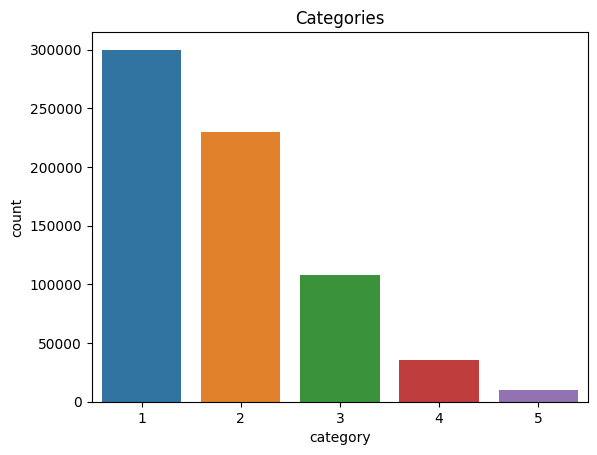

In [ ]:
# Plotting the Categories
sns.countplot(x='category', data=data_df)
plt.title('Categories')
plt.show()

In [ ]:
# Feature extraction
data_df['length'] = data_df['Domain'].apply(lambda x: len(x))
data_df['D_vowels'] = data_df['Domain'].apply(lambda x: sum(k in 'aeiou' for k in x.lower()))
data_df['D_consonant'] = data_df['Domain'].apply(lambda x: sum(k not in 'aeiou' for k in x.lower()))
data_df['D_digits'] = data_df['Domain'].apply(lambda x: sum(k.isdigit() for k in x))

# Display the updated dataset
print(data_df.head())

                   Domain  category  length  D_vowels  D_consonant  D_digits
0   grapevineplumbing.com         1      21         7           14         0
1   willswebsitedemos.com         1      21         7           14         0
2      wolfriverpress.com         1      18         5           13         0
3  fashionistatoolkit.com         1      22         9           13         0
4             407visa.com         1      11         3            8         3


In [ ]:
#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variable 'category'
en_c = LabelEncoder()
data_df['category'] = en_c.fit_transform(data_df['category'])

# Split the data
X = data_df[['length', 'D_vowels','D_consonant', 'D_digits']]
y = data_df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **1st Classifier Used: Random Forest Classifier**

In [ ]:
#Model Selection and Training

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Initialize classifiers for random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

#Evaluation
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred,average='weighted',zero_division=1)
rf_recall = recall_score(y_test, rf_pred,average='weighted',zero_division=1)
rf_f1 = f1_score(y_test, rf_pred,average='weighted',zero_division=1)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)


Accuracy: 0.4776
Precision: 0.4004
Recall: 0.4776
F1 Score: 0.4192
Confusion Matrix:
 [[41601 18281     0     0     0]
 [22510 23554     3     5     4]
 [ 8619 13052     0     5    18]
 [ 2283  4594     0    14    47]
 [  503  1463     0    12    99]]


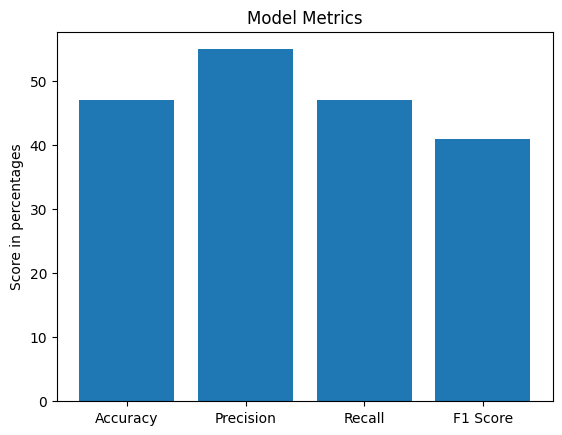

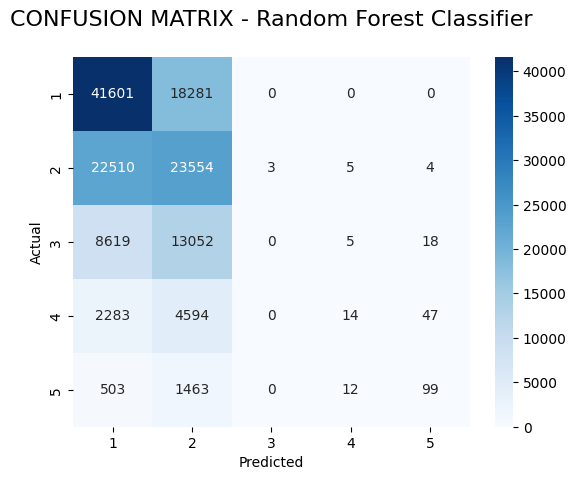

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#print the results of Random Forest Classifier
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print("Confusion Matrix:\n", rf_conf_matrix)
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [0.47*100, 0.55*100, 0.47*100, 0.41*100]
plt.bar(labels, scores)
plt.ylabel('Score in percentages')
plt.title('Model Metrics')
plt.show()
sns.heatmap( confusion_matrix(y_test, rf_pred), annot = True, cmap = "Blues", fmt = 'd', xticklabels = [1, 2, 3, 4, 5], yticklabels = [1, 2, 3, 4, 5])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Random Forest Classifier\n", size = 16);
print()

## **2nd Classifier Used: Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Initialize classifiers for gradient boostig
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

#evaluation for gradient boosting
gb_preds = gb_model.predict(X_test)



In [ ]:
# Calculate metrics for Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_preds)
gb_precision = precision_score(y_test, gb_preds, average='weighted',zero_division=1)
gb_recall = recall_score(y_test, gb_preds, average='weighted',zero_division=1)
gb_f1 = f1_score(y_test, gb_preds, average='weighted',zero_division=1)
gb_conf_matrix = confusion_matrix(y_test, gb_preds)

Accuracy: 0.4783
Precision: 0.5651
Recall: 0.4783
F1 Score: 0.4223
Confusion Matrix:
 [[39586 20296     0     0     0]
 [20403 25664     0     5     4]
 [ 7723 13948     0     5    18]
 [ 2034  4843     0    14    47]
 [  455  1511     0    12    99]]



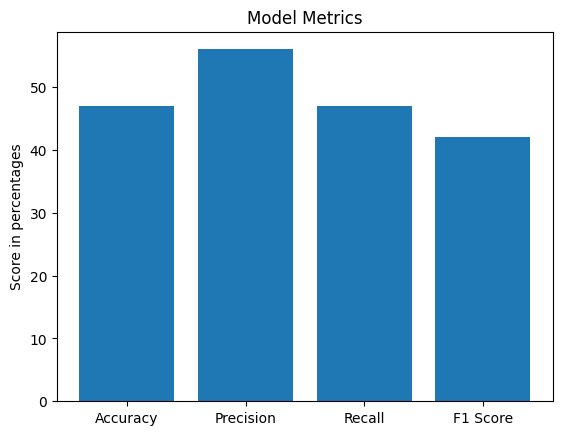

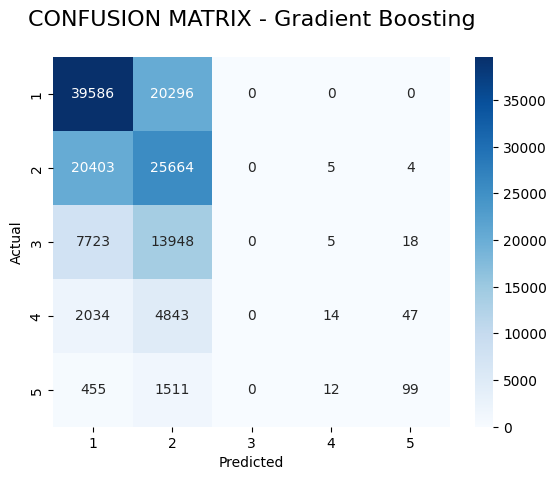

In [ ]:
#print the results of Gradient Boosting
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1 Score: {gb_f1:.4f}")
print("Confusion Matrix:\n", gb_conf_matrix)
print()
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [0.47*100, 0.56*100, 0.47*100, 0.42*100]
plt.bar(labels, scores)
plt.ylabel('Score in percentages')
plt.title('Model Metrics')
plt.show()
sns.heatmap( confusion_matrix(y_test, gb_preds), annot = True, cmap = "Blues", fmt = 'd', xticklabels = [1, 2, 3, 4, 5], yticklabels = [1, 2, 3, 4, 5])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Gradient Boosting\n", size = 16);
print()

## **3rd Classifier: Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_preds = nb_model.predict(X_test)



In [ ]:
#Calculate the metrics for Gaussian
nb_accuracy = accuracy_score(y_test, nb_preds)
nb_precision = precision_score(y_test, nb_preds, average='weighted',zero_division=1)
nb_recall = recall_score(y_test, nb_preds, average='weighted',zero_division=1)
nb_f1 = f1_score(y_test, nb_preds, average='weighted',zero_division=1)
nb_conf_matrix = confusion_matrix(y_test, nb_preds)

Accuracy: 0.4336
Precision: 0.5559
Recall: 0.4336
F1 Score: 0.3880
Confusion Matrix:
 [[18394 40030  1458     0     0]
 [ 4439 38597  3040     0     0]
 [ 1588 17836  2270     0     0]
 [  529  5313  1096     0     0]
 [  156  1355   566     0     0]]



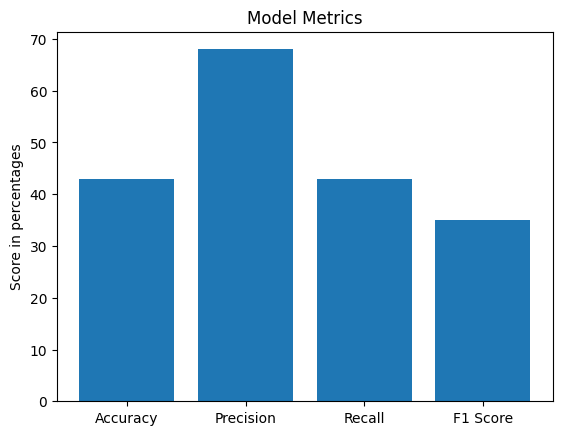

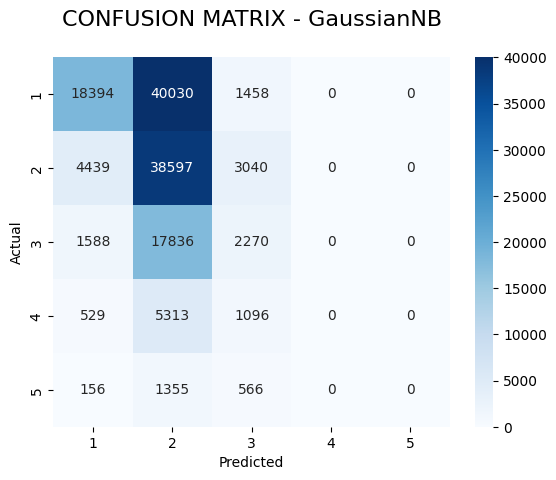

In [ ]:
#print the results of GaussianNB
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1 Score: {nb_f1:.4f}")
print("Confusion Matrix:\n", nb_conf_matrix)
print()
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [0.43*100, 0.68*100, 0.43*100, 0.35*100]
plt.bar(labels, scores)
plt.ylabel('Score in percentages')
plt.title('Model Metrics')
plt.show()
sns.heatmap( confusion_matrix(y_test, nb_preds), annot = True, cmap = "Blues", fmt = 'd', xticklabels = [1, 2, 3, 4, 5], yticklabels = [1, 2, 3, 4, 5])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - GaussianNB\n", size = 16);
print()

## **4th Classifier: Decision Tree Classifier**

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

In [ ]:
#Calculate the metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted',zero_division=1)
dt_recall = recall_score(y_test, dt_pred, average='weighted',zero_division=1)
dt_f1 = f1_score(y_test, dt_pred, average='weighted',zero_division=1)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

Accuracy: 0.4776
Precision: 0.5586
Recall: 0.4776
F1 Score: 0.4192
Confusion Matrix:
 [[41601 18281     0     0     0]
 [22513 23554     0     6     3]
 [ 8619 13052     0     5    18]
 [ 2283  4594     0    14    47]
 [  503  1463     0    12    99]]



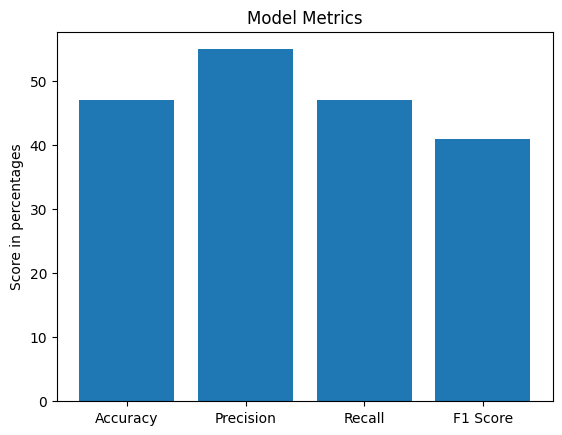

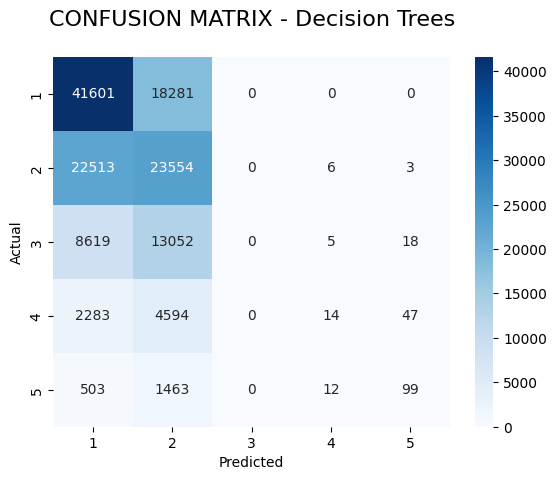

In [ ]:
#print the results of Decision Tree
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}")
print("Confusion Matrix:\n", dt_conf_matrix)
print()
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [0.47*100, 0.55*100, 0.47*100, 0.41*100]
plt.bar(labels, scores)
plt.ylabel('Score in percentages')
plt.title('Model Metrics')
plt.show()
sns.heatmap( confusion_matrix(y_test, dt_pred), annot = True, cmap = "Blues", fmt = 'd', xticklabels = [1, 2, 3, 4, 5], yticklabels = [1, 2, 3, 4, 5])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Decision Trees\n", size = 16);
print()

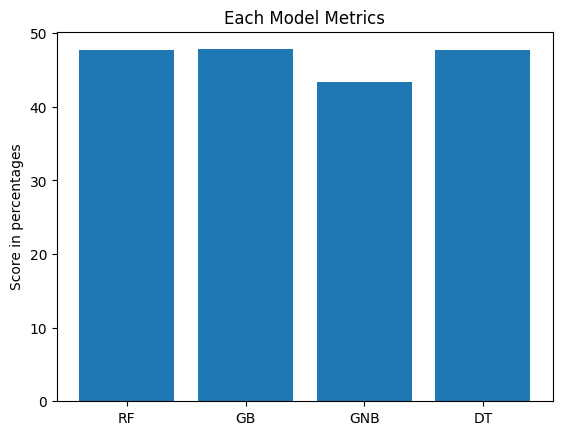

In [ ]:
#final results
labels = ['RF', 'GB', 'GNB', 'DT']
scores = [0.4776*100, 0.4783*100, 0.4336*100, 0.4776*100]
plt.bar(labels, scores)
plt.ylabel('Score in percentages')
plt.title('Each Model Metrics')
plt.show()


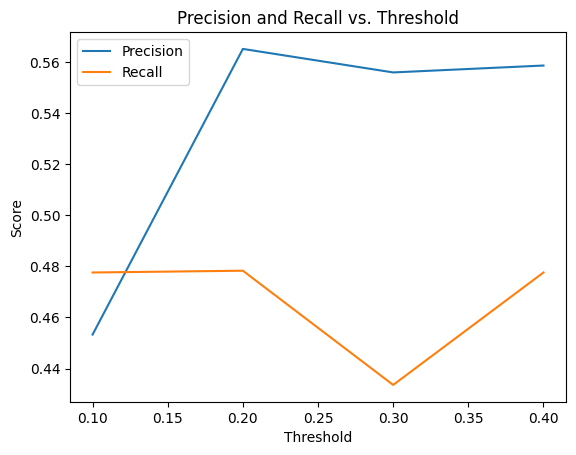

In [ ]:
import matplotlib.pyplot as plt

thresholds = [0.1, 0.2, 0.3, 0.4]
precisions = [0.4533, 0.5651, 0.5559, 0.5586]
recalls = [0.4776, 0.4783, 0.4336, 0.4776]

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.show()


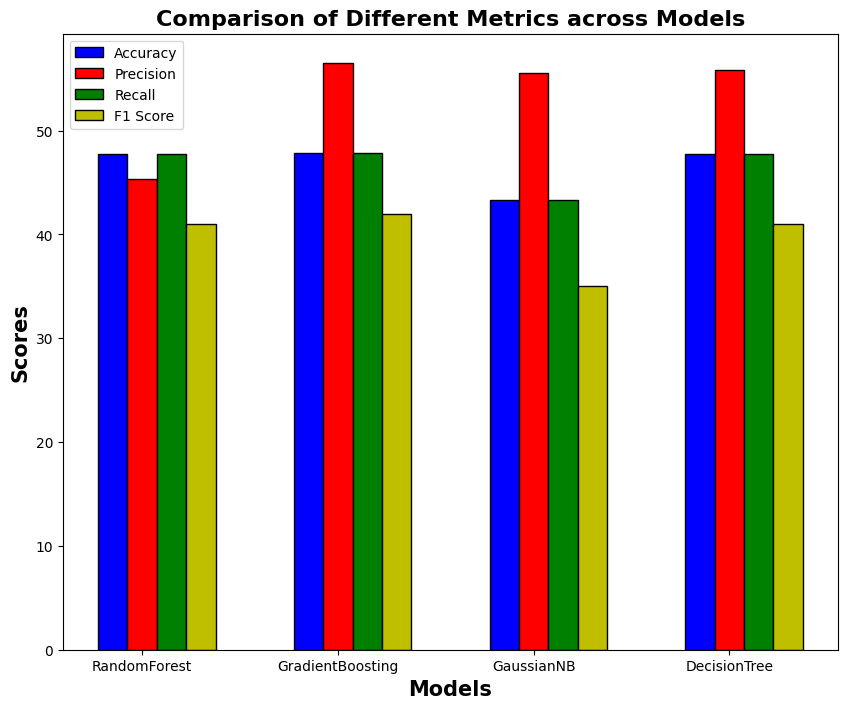

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
models = ['RandomForest', 'GradientBoosting', 'GaussianNB', 'DecisionTree']
accuracy = [0.4776*100, 0.4783*100, 0.4336*100, 0.4776*100]
precision= [0.4533*100, 0.5651*100, 0.5559*100, 0.5586*100]
recalls = [0.4776*100, 0.4783*100, 0.4336*100, 0.4776*100]
f1_score = [0.41*100, 0.42*100, 0.35*100, 0.41*100]

# Setting up the bar width and positions
barWidth = 0.15
r1 = np.arange(len(accuracy))
r2 = [k + barWidth for k in r1]
r3 = [k + barWidth for k in r2]
r4 = [k + barWidth for k in r3]

# Creating the plot
plt.figure(figsize=(10,8))

plt.bar(r1, accuracy, color='b', width=barWidth, edgecolor='black', label='Accuracy')
plt.bar(r2, precision, color='r', width=barWidth, edgecolor='black', label='Precision')
plt.bar(r3, recalls, color='g', width=barWidth, edgecolor='black', label='Recall')
plt.bar(r4, f1_score, color='y', width=barWidth, edgecolor='black', label='F1 Score')

# Adding labels
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Scores', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(accuracy))], models)

# Adding title and legend
plt.title('Comparison of Different Metrics across Models', fontweight='bold', fontsize=16)
plt.legend()

# Show the plot
plt.show()
